#  Scikit-Learn

* 다양한 일반 알고리즘을 효율적으로 구현해서 제공하는 라이브러리
*  깔끔하고 일관되고 간결한 API와 유용하고 완전한 온라인 문서가 특징

## 1. Scikit-Learn에서의 데이터 표현방식

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## 2. Scikit-Learn Estimator API


##### 일관성
* 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스를 공유한다.

##### 검사(inspection)
* 모든 지정된 모수(parameter)값은 공개(public)속성으로 노출된다.

##### 제한된 객체 계층구조
* 알고리즘만 파이썬 클래스에 의해 표현되고, 데이터 세트는 표준포맷(Numpy 배열, Pandas DataFrame, SciPy 희박행렬)으로 표현되며 매개변수명은 표준 파이썬 문자열을 사용한다. 

### API 기초

1. Scikit-Leanr으로부터 적절한 추정기(estimator)클래스를 임포트해서 모델의 클래스를 선택한다.
2. 이 클래스를 원하는 값으로 인스턴스화해서 모델의 초모수(hyperparameters)를 선택한다.
3. 데이터를 앞에서 논의한 내용에 따라 특징 배열과 대상벡터로 배치한다.
4. 모델 인스턴스으 fit()메서드를 호출해 모델을 데이터에 적합시킨다.
5. 모델을 새 데이터에 적용한다
 * 지도 학습인 경우, 대체로 predict()메서드를 사용해 알려지지 않은 데이터에 대한 레이블을 예측한다.
 * 비지도 학습인 경우, 대체로 transform()이나 predict()메서드를 사용해 데이터의 속성을 변환하거나 추론한다.

## 지도학습 예제: 선형회귀

In [5]:
import matplotlib.pyplot as plt
import numpy as np

(50,)
(50,)


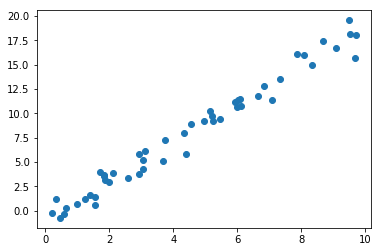

In [6]:
# 0. 샘플데이터 생성
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2* x-1 + rng.randn(50)
plt.scatter(x,y)
print(x.shape)
print(y.shape)

In [7]:
# 1. 모델클래스 선택
from sklearn.linear_model import LinearRegression

# 2. 모델 초모수(하이퍼 파라미터) 선택 및 인스턴스 생성
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# 특징행렬과 대상벡터로 배치
X = x[:, np.newaxis]
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [9]:
# 모델을 데이터에 적합
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
#계산된 결과를 모델전용속성에 저장되어 사용자가 탐색가능
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

In [12]:
# 5. 새로운 데이터 생성
xfit= np.linspace(-1, 11)

In [13]:
# 6. 알려지지 않은 데이터에 대한 레이블 예측
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [14]:
Xfit = Xfit.reshape(50, 1)

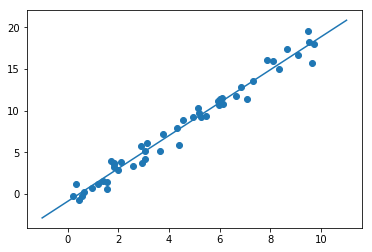

In [15]:
plt.scatter(x,y)
plt.plot(Xfit, yfit)

### 지도학습예제 : 붓꽃 분류

* 가우스 나이브 베이즈 (GNB, Gaussian Naive Bayes)로 알려진 매우 간단한 생성 모델을 사용.
* 각 클래스가 가우스 분포로 정렬된 축으로 부터 비롯된다고 가정.

In [59]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris,y_iris, random_state=1)

In [60]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.9736842105263158

### 비지도 학습예제: 붓꽃 차원

* 주성분 분석 (PCA, principle component analysis) : 선형차원 축소기법
* 붓꽃 4차원 데이터 : 각 표본에 대한 특징이 4개
* 더 낮은 차원을 가지는 적절한 표현방식 찾기 4개-> 2개

In [63]:
from sklearn.decomposition import PCA #1. 모델 클래스 선택
model = PCA(n_components=2) #2. 인스턴스 생성
model.fit(x_iris) #3. 모델 적합, Y 미지정
X_2D = model.transform(x_iris) #4. 데이터를 2차원으로 변환

In [64]:
X_2D.shape

(150, 2)

In [65]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

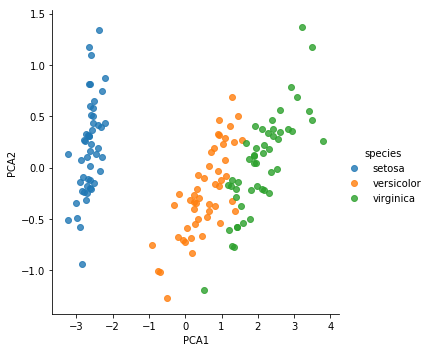

In [66]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

### 비지도 학습 예제: 붓꽃 군집화

* 가우스 혼합 모델(GMM, Gaussian mixture model)
* GMM을 사용하여 데이터들을 군집화 하고, 군집별로 그래프를 그려보면 PCA가 정확한지 알수 있다.

In [67]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

In [68]:
y_gmm.shape

(150,)

In [69]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

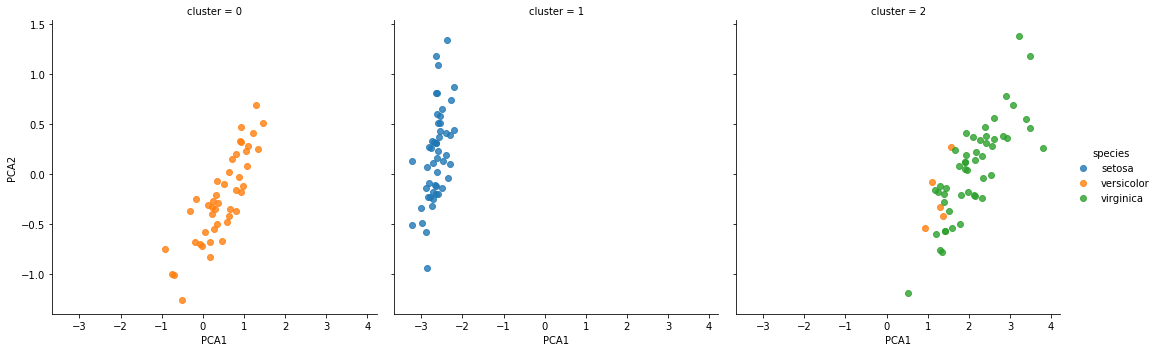

In [70]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

### 지도학습응용: 분류

In [71]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.images.shape

(1797, 8, 8)

In [72]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.target_names.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(10,)
(1797, 8, 8)


In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplot(10, 10, figsize=(8,8))
for i, axes in 